### Introduction

Between 300000 and 400000 cardiovascular accidents happen every year in France and 1 out of 3 of them is mortal. How can we predict the cardiovascular risk ?  
Unfortunately the list of risk factors is long : 
- gender, age and family history
- tabagism, sedentariness, alcoholism
- sleeping issues, obesity, depression
- diabetes, arterial hypertension, dyslipidemia

To prevent these risks, we develop a tool which will establish a diagnosis and enable a machine learning algorithm. This algorithm will predict if there is a cardiovascular risk or not.

### 1 - Data Exploration

In [1]:
# Importing Libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score,roc_auc_score

In [2]:
# Import the data
df = pd.read_csv('cardio_train.csv', sep=';')

In [3]:
# Check the 5 first rows
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Here, age is simply the number of days.

In [4]:
# Overall view of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
# Summary of numeric columns
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Find the different diagnosis outcomes
df['cardio'].unique()

array([0, 1])

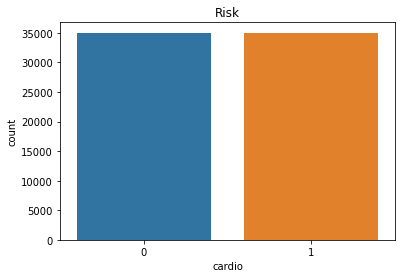

In [7]:
# Plot the number of patients by diagnosis
ax=sns.countplot(x='cardio',data=df)
ax.set_title('Risk')
sns.set_theme(style='darkgrid')

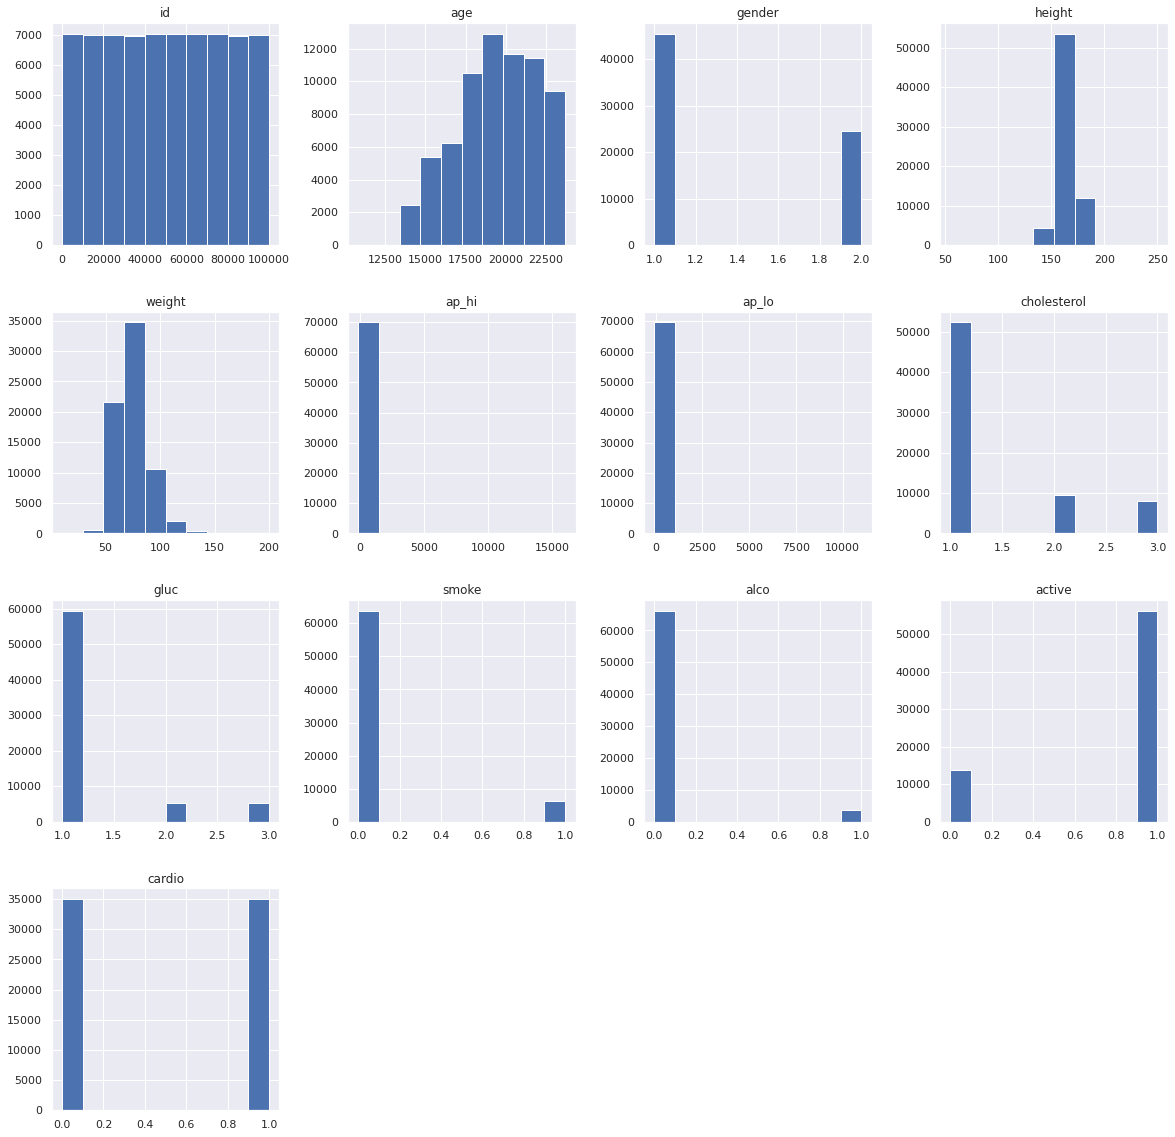

In [8]:
# Plot histograms for all numeric variables
df.hist(figsize=(20,20))
plt.show()

In [9]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [10]:
from pandas_profiling import ProfileReport

In [11]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [12]:
profile

### 2 - Building a Random Forest Model

In [13]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df.drop(columns=['id','cardio'])
y=df['cardio'] # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [14]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,random_state=42)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [15]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct ?
print("Accuracy for base model:", metrics.accuracy_score(y_test,y_pred).round(3))

Accuracy for base model: 0.713


### Using StandardScaler and MinMaxScaler

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
pipe1 = Pipeline([
    ('scaler', StandardScaler()),
    ('rf-std', clf),
])

pipe2 = Pipeline([
    ('MinMaxScaler', StandardScaler()),
    ('rf-std', clf),
])

In [17]:
# StandardScaler
pipe1.fit(X_train,y_train)
y_pred_std=pipe1.predict(X_test)

In [18]:
# MinMaxScaler
pipe2.fit(X_train,y_train)
y_pred_mm=pipe2.predict(X_test)

In [19]:
print("Accuracy for base model:", metrics.accuracy_score(y_test,y_pred).round(3))
print("Accuracy for model with StandardScaler:", metrics.accuracy_score(y_test,y_pred_std).round(3))
print("Accuracy for modelwith MinMaxScaler:", metrics.accuracy_score(y_test,y_pred_mm).round(3))

Accuracy for base model: 0.713
Accuracy for model with StandardScaler: 0.713
Accuracy for modelwith MinMaxScaler: 0.713


Since standardizing our model doesn't significantly improve it, we will continue our analysis with the base model.

### Define the most important features

Text(0.5, 0, 'Relative Importance')

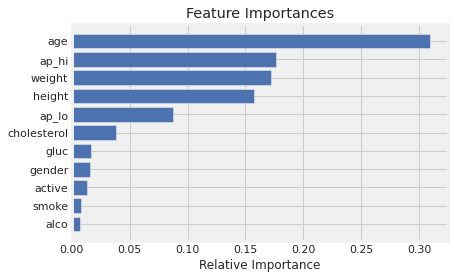

In [20]:
importances = clf.feature_importances_
indices = np.argsort(importances)
# style of the graph 
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')

In [21]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



### Generating the Model on Selected Features

In [22]:
# Split dataset into features and labels
X1=df[['age', 'ap_hi','weight','height','ap_lo','cholesterol']] 
y1=df['cardio']                                       
# Split dataset into training set and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42) # 80% training and 20% test

In [23]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X1_train,y1_train)

y1_pred=clf.predict(X1_test)

In [24]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy for base model and selected features:",metrics.accuracy_score(y1_test, y1_pred).round(3))


Accuracy for base model and selected features: 0.702


If we only retain the 6 most important features, the accuracy is still pretty high eventhough it is lower than if we kept all the features. But for the following analysis, we will keep all the features.

### Estimating the best parameters with GridSearchCV on the base model

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8],
    'criterion' :['gini', 'entropy']
}

In [26]:
CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [27]:
CV_clf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [28]:
crit=CV_clf.best_params_['criterion']
max_dph=CV_clf.best_params_['max_depth']
max_feat=CV_clf.best_params_['max_features']
n_estim=CV_clf.best_params_['n_estimators']

In [29]:
rfc1=RandomForestClassifier(max_features=max_feat, n_estimators=n_estim, max_depth=max_dph, criterion=crit)

In [30]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=200)

In [31]:
pred=rfc1.predict(X_test)

In [32]:
print("Accuracy for base model:", metrics.accuracy_score(y_test,y_pred).round(3))
print("Accuracy for Random Forest on CV data: ",metrics.accuracy_score(y_test,pred).round(3))

Accuracy for base model: 0.713
Accuracy for Random Forest on CV data:  0.738


Our model became better with the best parameters. Therefore  we will use them to predict if there is a risk for Arthur.

### Arthur's Case

Arthur is 53 years old, smokes, is doing sport, 175 cm, 85 kg, with a cholesterol rate above normal and a normal glucose rate, an average systolic blood pressure and a diastolic blood pressure corresponding to the 3rd quartile(50%-75%) of the dataset.

In [33]:
pr_hi= df.ap_hi.mean()
pr_lo= df.ap_lo.quantile(q=[0.5,0.75]).mean()
arthur_dic = {'age':53*365,
          'gender':2,
          'height':175,
          'weight':85,
          'ap_hi':pr_hi,
          'ap_lo':pr_lo,
          'cholesterol':2,
          'gluc':1,
          'smoke':1,
           'alco':0,
            'active':1}

arthur = [v for v in arthur_dic.values()]

In [34]:
arthur_dic = {k:[v] for k,v in arthur_dic.items()} 
df_arthur = pd.DataFrame(arthur_dic)
df_arthur

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,19345,2,175,85,128.817286,85.0,2,1,1,0,1


In [35]:
rfc1.predict_proba([arthur])

array([[0.5490226, 0.4509774]])

In [36]:
y_pred_arthur=rfc1.predict_proba([arthur])

In [37]:
print(f"Accuracy: {100 * metrics.accuracy_score(y_test, pred):.2f}")
# Classification report with the best parameters
print(classification_report(y_test, pred, target_names= ["No Problem","Cardio Risk"]))
print(f"Should Arthur worry ? No at {100 * float(y_pred_arthur[:,0]):.2f} % Yes at \
{100 * float(y_pred_arthur[:,1]):.2f} %")

Accuracy: 73.79
              precision    recall  f1-score   support

  No Problem       0.71      0.79      0.75      6988
 Cardio Risk       0.77      0.68      0.72      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

Should Arthur worry ? No at 54.90 % Yes at 45.10 %
